# Simple Linear Regression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/Praktikum Pemrograman 5

/content/drive/My Drive/Colab Notebooks/Praktikum Pemrograman 5


In [3]:
ls

'4a Simple Linear Regression.ipynb'                          'Data SLR.csv'
'4b Multivariate Linear Regression.ipynb'                     decision_tree.jpg
'5 Diabetes Classification using KNN & Naive Bayes .ipynb'    diabetes.csv
'6 Diabetes Classification using Decision Tree & SVM.ipynb'  'House Price MLR.csv'
'7 Diabetes Classification using Random Forest.ipynb'


In [4]:
path = "/content/drive/My Drive/Colab Notebooks/Praktikum Pemrograman 5"

### Load library

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load datasets

In [6]:
#Nama dataframe kita adalah df yang berisi data dari data.csv
#Hanya menggunakan kolom horsepower dan price
df = pd.read_csv(path + '/Data SLR.csv', usecols=['horsepower', 'price'])

### Sneak peak data

In [7]:
#Melihat 5 baris teratas dari data
#Independent variabel(x) adalah horsepower
#Dependent variabel(y) adalah price
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [8]:
#Mengetahui jumlah kolom dan baris dari data
#Data kita mempunya 2 kolom dengan 200 baris
df.shape

(200, 2)

In [9]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [10]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


### Handling Missing Values

In [11]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

,0
horsepower,0
price,0


### Exploratory Data Analysis (EDA)

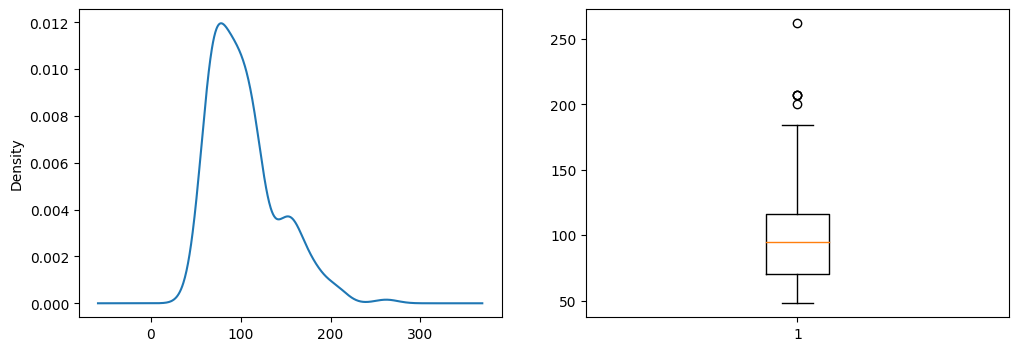

In [12]:
#Univariate analysis horsepower
#Melihat distribusi dari horsepower
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

- Dapat dilihat bahwa density dari horsepower paling tinggi di nilai 100.
- Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi).

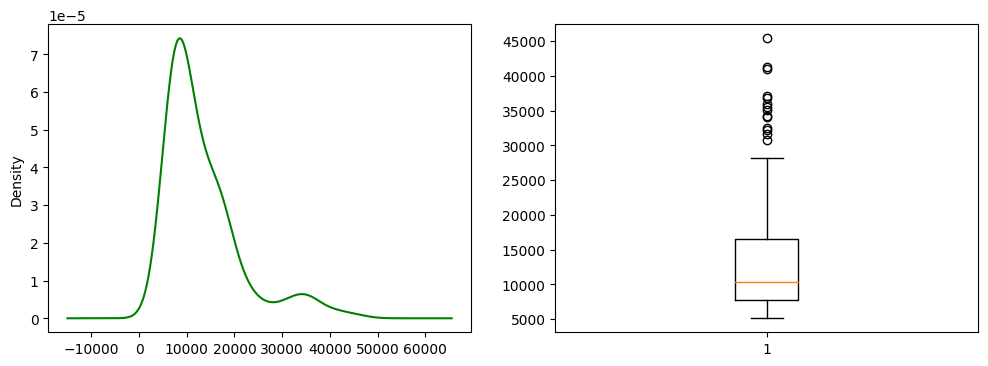

In [13]:
#Univariate analysis price
#Melihat distribusi dari price
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

- Density dari price paling tinggi di nilai 10000.
- Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi).

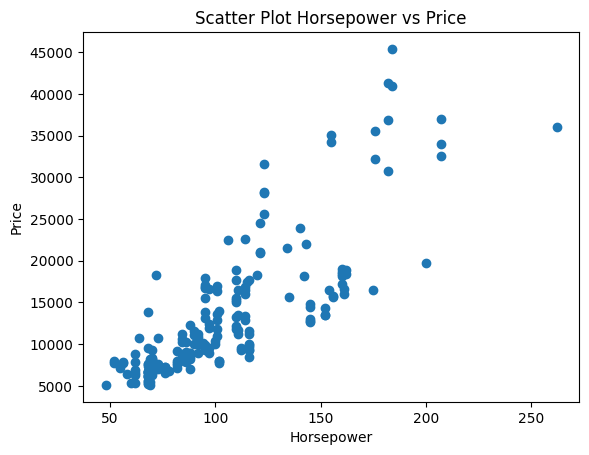

In [14]:
#Bivariate analysis horsepower dan price
#Menggunakan scatter plot
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

- Dari scatter plot dapat dilihat bahwa data memiliki korelasi positif yang cukup signifikan.
- Hal ini berarti dengan bertambahnya nilai dari horsepower maka nilai price pun akan bertambah

In [15]:
#Mengetahui nilai korelasi dari horsepower dan price
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi
df.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


- Setelah kita tahu tentang karakteristik data kita, bisa dilanjutkan ke tahap modelling

### Modelling

In [16]:
#Recall data kita
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


# Split Data

In [17]:
#Pertama, buat variabel x dan y
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [18]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# SLR Model

Linear regression adalah metode statistik yang digunakan untuk memodelkan hubungan antara satu variabel dependen (terikat) dan satu atau lebih variabel independen (bebas). Model ini digunakan untuk memprediksi nilai variabel dependen berdasarkan nilai variabel independen. Jika hanya ada satu variabel independen, model tersebut disebut regresi linear sederhana, sedangkan jika ada lebih dari satu, disebut regresi linear berganda.

In [19]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [20]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [21]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[165.99136945]]
[-3988.05631331]


- dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi:
Y = 164.73x - 3903.39

In [22]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.7675710840822998

- Model kita mendapatkan accuracy score sebesar 78.68%

# Hitung Error

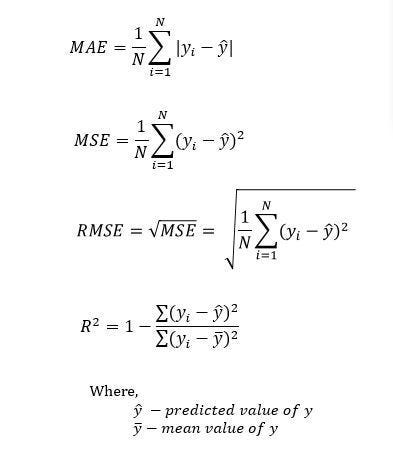

Metrik evaluasi yang digunakan untuk menilai kualitas model regresi, terutama dalam konteks linear regression. Berikut penjelasan dari masing-masing metrik:

#### 1. MAE adalah rata-rata dari nilai absolut perbedaan antara nilai sebenarnya dan nilai prediksi.
#### 2. MSE adalah rata-rata dari kuadrat perbedaan antara nilai sebenarnya dan nilai prediksi.
#### 3. RMSE adalah akar kuadrat dari MSE. Ini memberikan interpretasi error dalam unit yang sama dengan variabel target (output), sehingga lebih mudah diinterpretasikan.
#### 4. R^2(Koefisien Determinasi) ukuran seberapa baik variabel independen menjelaskan variabilitas variabel dependen.

In [29]:
df_comparison = pd.DataFrame({'y_test': y_test.flatten(), 'y_pred': y_pred.flatten()})
print(df_comparison)

     y_test        y_pred
0   15040.0  14270.994326
1   11845.0  12777.072001
2    6692.0   7299.356809
3   16558.0  22736.554168
4    6488.0   6303.408592
5   18280.0  15930.908020
6   15580.0  11781.123784
7   35550.0  25226.424709
8   15690.0  21906.597320
9    6295.0   7631.339548
10   7895.0  10287.201459
11  10595.0   9955.218720
12  10345.0  12611.080631
13  10898.0  11283.149676
14  10945.0  12777.072001
15   5499.0   7465.348178
16  18920.0  14270.994326
17  35056.0  21740.605951
18   5389.0   7299.356809
19  10198.0  11615.132415
20  37028.0  30372.157162
21   7775.0   9623.235981
22  11048.0  10951.166937
23   6692.0   7299.356809
24   7395.0   7299.356809
25   6669.0   7299.356809
26  16695.0  11781.123784
27  13415.0  14934.959804
28   8921.0  10619.184198
29  18150.0  22570.562798
30   8845.0   9955.218720
31  16845.0  14934.959804
32   6479.0   5639.443115
33  32250.0  25226.424709
34   7775.0   4643.494898
35  19045.0  22570.562798
36  11850.0  14270.994326
37  21485.0 

In [27]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 15867298.233639974


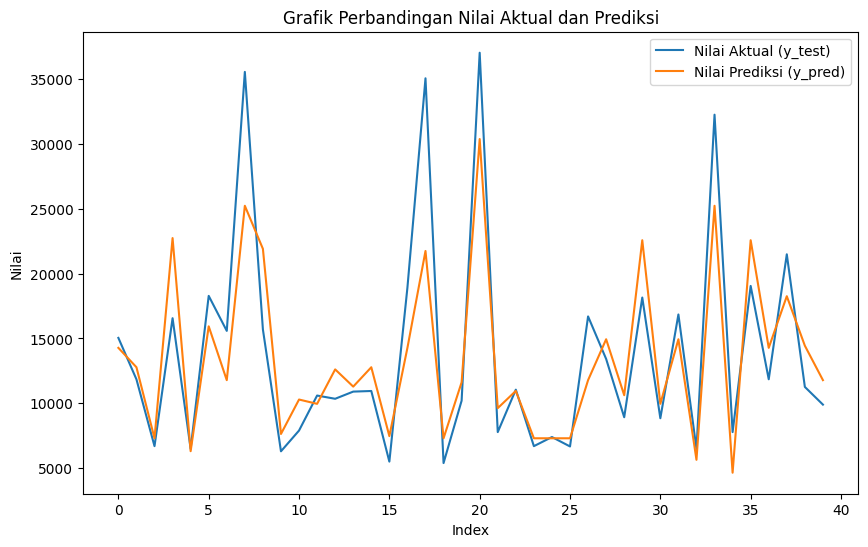

In [32]:
# tampilkan grafik y test dan y pred dalam line chart

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Nilai Aktual (y_test)')
plt.plot(y_pred, label='Nilai Prediksi (y_pred)')
plt.xlabel("Index")
plt.ylabel("Nilai")
plt.title("Grafik Perbandingan Nilai Aktual dan Prediksi")
plt.legend()
plt.show()

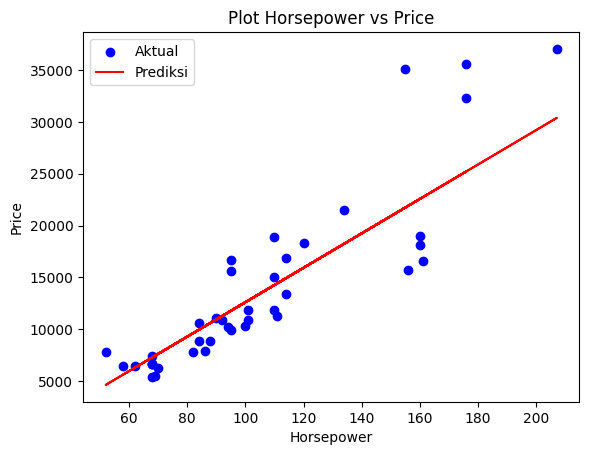

In [34]:
# visualisasi aktual vs prediksi menggunakan data testing
#Garis merah merupakan garis regresi dari persamaan yang kita dapat tadi
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test, color='blue', label='Aktual') # Warna biru untuk data aktual
plt.plot(x_test, y_prediksi, c='r', label='Prediksi') # Warna merah untuk garis prediksi
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')
plt.legend() # Menampilkan legenda untuk membedakan aktual dan prediksi
plt.show()

### Prediction
- Yuk kita prediksi harga mobil ketika memiliki horsepower 100, 150, dan 200

In [24]:
#Prediksi harga mobil dengan horsepower 100
lin_reg.predict([[100]])

array([[12611.08063131]])

In [25]:
#Prediksi harga mobil dengan horsepower 150
lin_reg.predict([[150]])

array([[20910.64910363]])

In [26]:
#Prediksi harga mobil dengan horsepower 200
lin_reg.predict([[200]])

array([[29210.21757594]])

- dengan melihat prediksi harga diatas, didapatkan bahwa hipotesis awal kita memang benar yaitu mobil dengan Horsepower 200 memiliki harga yang lebih mahal daripada yang lain!

# https://scikit-learn.org/stable/user_guide.html

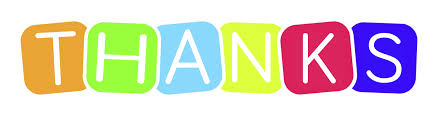